# Geocoder de Bases de Datos

por Kevin Martinez-Folgar,MD.<br/>
*<kmartinezfolgar@gmail.com>*<br/>
*<kmartinez@incap.int>*

<hr/>

Primero importamos la libreria que nos servira para geocodificar

In [1]:
import geocoder as gc

dentro de la libreria Geocoder tenemos funciones para cada uno de los geocodificadores más frecuentes. 

    ArcGIS
    Baidu
    Bing
    CanadaPost
    FreeGeoIP.net
    Gaode
    GeocodeFarm
    Geocoder.ca
    GeoNames
    GeoOttawa
    Google
    HERE
    IP Info.io
    LocationIQ
    Mapbox
    MapQuest
    MaxMind
    Opencage
    OpenStreetMap
    Tamu
    TomTom
    What3Words
    Yahoo
    Yandex
    TGOS

En este caso utilizaremos ArcGIS

In [2]:
gc.arcgis("4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guatemala, Guatemala")

<[OK] Arcgis - Geocode [Zona 4, Guatemala]>

In [3]:
var1 = gc.arcgis("4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guatemala, Guatemala")
var1

<[OK] Arcgis - Geocode [Zona 4, Guatemala]>

In [4]:
var1.geojson

{'features': [{'bbox': [-90.52924272899998,
    14.607440621000023,
    -90.50524272899997,
    14.631440621000024],
   'geometry': {'coordinates': [-90.51724272899997, 14.619440621000024],
    'type': 'Point'},
   'properties': {'address': 'Zona 4, Guatemala',
    'bbox': [-90.52924272899998,
     14.607440621000023,
     -90.50524272899997,
     14.631440621000024],
    'confidence': 7,
    'lat': 14.619440621000024,
    'lng': -90.51724272899997,
    'ok': True,
    'quality': 'Locality',
    'raw': {'extent': {'xmax': -90.50524272899997,
      'xmin': -90.52924272899998,
      'ymax': 14.631440621000024,
      'ymin': 14.607440621000023},
     'feature': {'attributes': {'Addr_Type': 'Locality', 'Score': 80},
      'geometry': {'x': -90.51724272899997, 'y': 14.619440621000024}},
     'name': 'Zona 4, Guatemala'},
    'score': 80,
    'status': 'OK'},
   'type': 'Feature'}],
 'type': 'FeatureCollection'}

In [5]:
var1.json

{'address': 'Zona 4, Guatemala',
 'bbox': [-90.52924272899998,
  14.607440621000023,
  -90.50524272899997,
  14.631440621000024],
 'confidence': 7,
 'lat': 14.619440621000024,
 'lng': -90.51724272899997,
 'ok': True,
 'quality': 'Locality',
 'raw': {'extent': {'xmax': -90.50524272899997,
   'xmin': -90.52924272899998,
   'ymax': 14.631440621000024,
   'ymin': 14.607440621000023},
  'feature': {'attributes': {'Addr_Type': 'Locality', 'Score': 80},
   'geometry': {'x': -90.51724272899997, 'y': 14.619440621000024}},
  'name': 'Zona 4, Guatemala'},
 'score': 80,
 'status': 'OK'}

In [6]:
var1.json["raw"]

{'extent': {'xmax': -90.50524272899997,
  'xmin': -90.52924272899998,
  'ymax': 14.631440621000024,
  'ymin': 14.607440621000023},
 'feature': {'attributes': {'Addr_Type': 'Locality', 'Score': 80},
  'geometry': {'x': -90.51724272899997, 'y': 14.619440621000024}},
 'name': 'Zona 4, Guatemala'}

In [7]:
var1.json["raw"]["feature"]

{'attributes': {'Addr_Type': 'Locality', 'Score': 80},
 'geometry': {'x': -90.51724272899997, 'y': 14.619440621000024}}

In [8]:
var1.json["raw"]["feature"]["geometry"]

{'x': -90.51724272899997, 'y': 14.619440621000024}

In [9]:
var1.json["raw"]["feature"]["geometry"]["y"]

14.619440621000024

In [10]:
var1.json["raw"]["feature"]["geometry"]["x"]

-90.51724272899997

### Abrimos la Base de datos a utilizar

In [11]:
#import tkinter.filedialog as fd
#db = fd.askopenfilename()
db = "Direcciones Guatemala - Ejercicio Geocoder.xlsx"
db

'Direcciones Guatemala - Ejercicio Geocoder.xlsx'

In [12]:
import pandas as pd

In [13]:
db1 = pd.read_excel(db)
db1

,ID,Dirección
0,1,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4
1,2,RUTA 8 04-51 CANTON EXPOSICION ZONA 4
2,3,2 CALLE 11-12 BARRIO MODERNO ZONA 2
3,4,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4
4,5,RUTA 8 04-51 CANTON EXPOSICION ZONA 4
5,6,2 CALLE 11-12 BARRIO MODERNO ZONA 2
6,7,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4
7,8,RUTA 8 04-51 CANTON EXPOSICION ZONA 4
8,9,2 CALLE 11-12 BARRIO MODERNO ZONA 2


Le agregamos municipio y pais 

In [14]:
db1["Municipio"] = "Guatemala"

In [15]:
db1["Pais"] = "Guatemala"

In [16]:
db1

,ID,Dirección,Municipio,Pais
0,1,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala
1,2,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala
2,3,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala
3,4,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala
4,5,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala
5,6,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala
6,7,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala
7,8,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala
8,9,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala


Unimos la dirección para poder Georreferenciar luego 

In [17]:
db1["Direccion Total"] = db1["Dirección"] + ", " + db1["Municipio"] + "," + db1["Pais"]

In [18]:
db1

,ID,Dirección,Municipio,Pais,Direccion Total
0,1,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guat..."
1,2,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"RUTA 8 04-51 CANTON EXPOSICION ZONA 4, Guatema..."
2,3,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala,"2 CALLE 11-12 BARRIO MODERNO ZONA 2, Guatemala..."
3,4,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guat..."
4,5,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"RUTA 8 04-51 CANTON EXPOSICION ZONA 4, Guatema..."
5,6,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala,"2 CALLE 11-12 BARRIO MODERNO ZONA 2, Guatemala..."
6,7,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guat..."
7,8,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"RUTA 8 04-51 CANTON EXPOSICION ZONA 4, Guatema..."
8,9,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala,"2 CALLE 11-12 BARRIO MODERNO ZONA 2, Guatemala..."


Ahora vamos a crear 2 listas vacias a las que posteriormente vamos a agregar cada una de las latitudes y longitudes

In [19]:
lat = []
lon = []
addres_geocode = []
db2 = db1["Direccion Total"].copy()
for row in db2:
    temp1 = gc.arcgis(row)
    lat.append(temp1.json["raw"]["feature"]["geometry"]["y"])
    lon.append(temp1.json["raw"]["feature"]["geometry"]["x"])
    addres_geocode.append(temp1.json["address"])

Ahora asignamos la latitud y la longitud a columnas dentro de nuestra base de datos

In [20]:
db1["latitud"] = lat
db1["longitud"] = lon
db1["direccion supuesta"] = addres_geocode
db1

,ID,Dirección,Municipio,Pais,Direccion Total,latitud,longitud,direccion supuesta
0,1,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guat...",14.619441,-90.517243,"Zona 4, Guatemala"
1,2,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"RUTA 8 04-51 CANTON EXPOSICION ZONA 4, Guatema...",14.619441,-90.517243,"Zona 4, Guatemala"
2,3,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala,"2 CALLE 11-12 BARRIO MODERNO ZONA 2, Guatemala...",14.648776,-90.506982,"2 Calle 11-12, Zona 2, Guatemala"
3,4,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guat...",14.619441,-90.517243,"Zona 4, Guatemala"
4,5,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"RUTA 8 04-51 CANTON EXPOSICION ZONA 4, Guatema...",14.619441,-90.517243,"Zona 4, Guatemala"
5,6,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala,"2 CALLE 11-12 BARRIO MODERNO ZONA 2, Guatemala...",14.648776,-90.506982,"2 Calle 11-12, Zona 2, Guatemala"
6,7,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guat...",14.619441,-90.517243,"Zona 4, Guatemala"
7,8,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"RUTA 8 04-51 CANTON EXPOSICION ZONA 4, Guatema...",14.619441,-90.517243,"Zona 4, Guatemala"
8,9,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala,"2 CALLE 11-12 BARRIO MODERNO ZONA 2, Guatemala...",14.648776,-90.506982,"2 Calle 11-12, Zona 2, Guatemala"


In [21]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(db1.longitud, db1.latitud)]
df = db1.drop(['longitud', 'latitud'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [22]:
gdf

,ID,Dirección,Municipio,Pais,Direccion Total,direccion supuesta,geometry
0,1,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guat...","Zona 4, Guatemala",POINT (-90.51724272899997 14.61944062100002)
1,2,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"RUTA 8 04-51 CANTON EXPOSICION ZONA 4, Guatema...","Zona 4, Guatemala",POINT (-90.51724272899997 14.61944062100002)
2,3,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala,"2 CALLE 11-12 BARRIO MODERNO ZONA 2, Guatemala...","2 Calle 11-12, Zona 2, Guatemala",POINT (-90.50698208676596 14.64877630891364)
3,4,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guat...","Zona 4, Guatemala",POINT (-90.51724272899997 14.61944062100002)
4,5,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"RUTA 8 04-51 CANTON EXPOSICION ZONA 4, Guatema...","Zona 4, Guatemala",POINT (-90.51724272899997 14.61944062100002)
5,6,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala,"2 CALLE 11-12 BARRIO MODERNO ZONA 2, Guatemala...","2 Calle 11-12, Zona 2, Guatemala",POINT (-90.50698208676596 14.64877630891364)
6,7,4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"4 AVENIDA 06-63 CANTON EXPOSICION ZONA 4, Guat...","Zona 4, Guatemala",POINT (-90.51724272899997 14.61944062100002)
7,8,RUTA 8 04-51 CANTON EXPOSICION ZONA 4,Guatemala,Guatemala,"RUTA 8 04-51 CANTON EXPOSICION ZONA 4, Guatema...","Zona 4, Guatemala",POINT (-90.51724272899997 14.61944062100002)
8,9,2 CALLE 11-12 BARRIO MODERNO ZONA 2,Guatemala,Guatemala,"2 CALLE 11-12 BARRIO MODERNO ZONA 2, Guatemala...","2 Calle 11-12, Zona 2, Guatemala",POINT (-90.50698208676596 14.64877630891364)


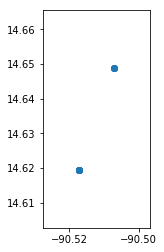

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
gdf.plot()